In [185]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [216]:
l = pd.read_csv('ledgers.csv')
l.shape

(379225, 10)

In [290]:
l.columns

Index(['Unnamed: 0', 'LedgerIndex', 'hash', 'CloseTime', 'CloseTimeTimestamp',
       'CloseTimeHuman', 'TotalCoins', 'ParentHash', 'AccountHash',
       'TransactionHash'],
      dtype='object')

In [219]:
t = pd.read_csv('transactions.csv')

In [220]:
t['TakerGetsDEX']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: TakerGetsDEX, Length: 100000, dtype: object

Value has to be normalized into USD for example

In [221]:
t.groupby('TransactionType').Fee.count().to_frame().reset_index()

,TransactionType,Fee
0,AccountSet,1815
1,OfferCancel,48820
2,OfferCreate,36823
3,Payment,12394
4,SignerListSet,1
5,TrustSet,147


In [222]:
t.shape

(100000, 66)

In [223]:
df0 = t.groupby('currency').Fee.count().to_frame().reset_index()

In [224]:
df0

,currency,Fee
0,AUD,7
1,BSD,9
2,BTC,662
3,BTS,19
4,CCK,75
5,CNY,138
6,ETC,2
7,ETH,8
8,EUR,10
9,GBP,1


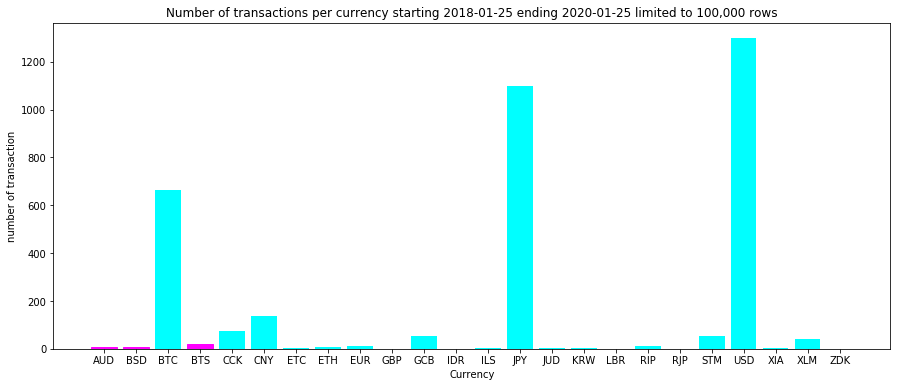

In [225]:
fig = plt.figure(figsize=(15,6))

x = df0['currency']   
y = df0['Fee']

barlist = plt.bar(x,y, color='cyan')
barlist[0].set_color('magenta')
barlist[1].set_color('magenta')
barlist[3].set_color('magenta')

plt.xlabel('Currency') 
plt.ylabel('number of transaction')
plt.title('Number of transactions per currency starting 2018-01-25 ending 2020-01-25 limited to 100,000 rows')

#NA = mpatches.Patch(color='cyan', label='BTC: 24199')
#BRL = mpatches.Patch(color='magenta', label='BRL: 438')
#AGC = mpatches.Patch(color='magenta', label='AGC: 549')
#ADA = mpatches.Patch(color='magenta', label='ADA: 25')
#AUD = mpatches.Patch(color='magenta', label='AUD: 2')
#plt.legend(handles=[NA,BRL,AGC,ADA,AUD], loc=2)

fig.savefig('plot0.png')

plt.show()

## Most transactions used BTC

In [226]:
df1 = t.groupby('currency').Fee.mean().to_frame().reset_index()

In [227]:
df1

,currency,Fee
0,AUD,14289.142857
1,BSD,12.000000
2,BTC,25072.394260
3,BTS,6588.789474
4,CCK,4539.893333
5,CNY,18492.463768
6,ETC,10.000000
7,ETH,15634.375000
8,EUR,5811.800000
9,GBP,12.000000


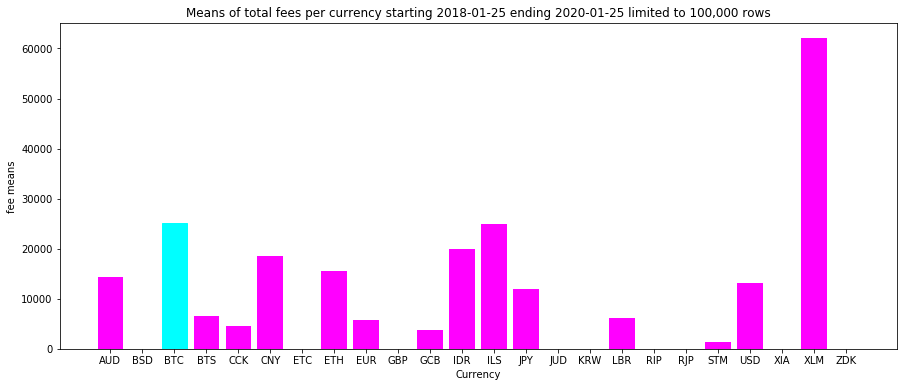

In [228]:
fig = plt.figure(figsize=(15,6))

x = df1['currency']   
y = df1['Fee']

barlist = plt.bar(x,y, color='magenta')
barlist[2].set_color('cyan')

plt.xlabel('Currency') 
plt.ylabel('fee means')
plt.title('Means of total fees per currency starting 2018-01-25 ending 2020-01-25 limited to 100,000 rows')

#NA = mpatches.Patch(color='magenta', label='BTC: 683.4')
#BRL = mpatches.Patch(color='magenta', label='BRL: 614.82')
#AGC = mpatches.Patch(color='magenta', label='AGC: 1000')
#ADA = mpatches.Patch(color='magenta', label='ADA: 231.36')
#AUD = mpatches.Patch(color='cyan', label='AUD: 10,006')
#plt.legend(handles=[AUD,AGC,NA,BRL,ADA], loc=2)

fig.savefig('plot1.png')
plt.show()

## Why are the fees so important for BTC & XLM transactions?

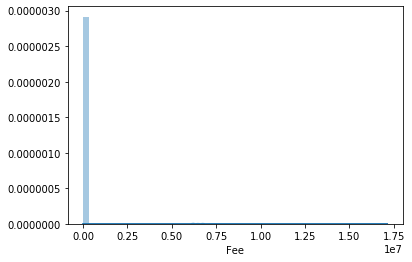

In [289]:
sns.distplot(t['Fee'])

#### I assume that 'value' is the amount of XRP that have been transacted

In [230]:
df2 = t.groupby(['issuer']).Fee.count().to_frame().reset_index()

In [231]:
df2

,issuer,Fee
0,r42jqJUTJamGf9siccodfvijwFEBixucEG,8
1,r4MmkWD7XjZuHGypMgerCRzi1Z4TFs9kwQ,1
2,r4VybA9rPTD7oXZ38Ewy442bZ4F2uHfaZe,4
3,r4icMmWMEotydoxMe8paYCP2qo2hzpxTUU,1
4,r94s8px6kSw1uZ1MV98dhSRTvc6VMPoPcN,1090
...,...,...
85,rwHNLDQJhnfGipfDRWNXUCDw5GHUowg9so,1
86,rwNv9SQHvBwVnntYpCWGHDhFQwkf9Zjfe1,1
87,rwdRVQZgJYsXaa6mbAvbPh45JLrhcBEDbR,1
88,rwjwQbWvjtmFNWNLeM3HHAxnfUKBBjn3TJ,1


In [248]:
df2.Fee.max()

1090

In [234]:
df2[df2['Fee'] == 1090 ]

,issuer,Fee
4,r94s8px6kSw1uZ1MV98dhSRTvc6VMPoPcN,1090


The issuer 'r94s8px6kSw1uZ1MV98dhSRTvc6VMPoPcN' has done the most important number of transactions compared to other issuers. Let's learn about their transactions.

 1 AUD to USD = 0.682717 US Dollars

In [246]:
df3 = t.groupby(['issuer']).Fee.sum().to_frame().reset_index()

In [247]:
df3

,issuer,Fee
0,r42jqJUTJamGf9siccodfvijwFEBixucEG,80000
1,r4MmkWD7XjZuHGypMgerCRzi1Z4TFs9kwQ,20000
2,r4VybA9rPTD7oXZ38Ewy442bZ4F2uHfaZe,40
3,r4icMmWMEotydoxMe8paYCP2qo2hzpxTUU,12
4,r94s8px6kSw1uZ1MV98dhSRTvc6VMPoPcN,13164000
...,...,...
85,rwHNLDQJhnfGipfDRWNXUCDw5GHUowg9so,12
86,rwNv9SQHvBwVnntYpCWGHDhFQwkf9Zjfe1,12
87,rwdRVQZgJYsXaa6mbAvbPh45JLrhcBEDbR,12
88,rwjwQbWvjtmFNWNLeM3HHAxnfUKBBjn3TJ,12


In [249]:
df3.Fee.max()

15697734

In [251]:
df3[df3['Fee'] == 15697734 ]

,issuer,Fee
83,rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B,15697734


The issuer 'rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B' has paid the most important amount of fees compared to other issuers. Let's learn about their transactions.

In [299]:
#t.set_index(['issuer', 'currency'])
#t.set_index(['issuer'])
ser = t.groupby(['issuer','currency','value']).Fee.mean()

In [300]:
ser

issuer                              currency  value       
r42jqJUTJamGf9siccodfvijwFEBixucEG  CCK       0.010000        10000.0
r4MmkWD7XjZuHGypMgerCRzi1Z4TFs9kwQ  AUD       1298.500000     20000.0
r4VybA9rPTD7oXZ38Ewy442bZ4F2uHfaZe  BTC       200.000000         10.0
r4icMmWMEotydoxMe8paYCP2qo2hzpxTUU  CNY       0.000100           12.0
r94s8px6kSw1uZ1MV98dhSRTvc6VMPoPcN  JPY       1169.025094     12000.0
                                                               ...   
rwHNLDQJhnfGipfDRWNXUCDw5GHUowg9so  BSD       30000.000000       12.0
rwNv9SQHvBwVnntYpCWGHDhFQwkf9Zjfe1  USD       1.000000           12.0
rwdRVQZgJYsXaa6mbAvbPh45JLrhcBEDbR  CNY       200.100000         12.0
rwjwQbWvjtmFNWNLeM3HHAxnfUKBBjn3TJ  BTC       0.020000           12.0
rwz65qChamzmqMguSSWHXYo2FBvPUsJuQR  GCB       100.000000         12.0
Name: Fee, Length: 704, dtype: float64

In [301]:
ser.loc['r94s8px6kSw1uZ1MV98dhSRTvc6VMPoPcN'] # biggest nb of transactions

currency  value        
JPY       1169.025094       12000.0
          3674.182833       12000.0
          6720.198675      100000.0
          7348.439151       12000.0
          10975.504990      12000.0
                             ...   
          222744.143119     12000.0
          222745.115041     12000.0
          222745.117086     12000.0
          222745.570319     12000.0
          222745.573851     12000.0
Name: Fee, Length: 114, dtype: float64

In [302]:
ser.loc['rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B'] # paid the most fees

currency  value     
BTC       0.000019        6228.0
          0.000020       14883.0
          0.001177      100000.0
          0.001180      100000.0
          0.001184      100000.0
                          ...   
USD       299.361277        15.0
          424.211577        15.0
          576.815989        11.0
          578.903620        11.0
          581.800573        11.0
Name: Fee, Length: 200, dtype: float64

In [303]:
df = t.pivot_table(values='value', index='issuer', columns='currency')

In [304]:
df

currency,AUD,BSD,BTC,BTS,CCK,CNY,ETC,ETH,EUR,GBP,...,JUD,KRW,LBR,RIP,RJP,STM,USD,XIA,XLM,ZDK
issuer,,,,,,,,,,,,,,,,,,,,,
r42jqJUTJamGf9siccodfvijwFEBixucEG,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r4MmkWD7XjZuHGypMgerCRzi1Z4TFs9kwQ,1298.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r4VybA9rPTD7oXZ38Ewy442bZ4F2uHfaZe,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r4icMmWMEotydoxMe8paYCP2qo2hzpxTUU,NaN,NaN,NaN,NaN,NaN,0.0001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r94s8px6kSw1uZ1MV98dhSRTvc6VMPoPcN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rwHNLDQJhnfGipfDRWNXUCDw5GHUowg9so,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rwNv9SQHvBwVnntYpCWGHDhFQwkf9Zjfe1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
rwdRVQZgJYsXaa6mbAvbPh45JLrhcBEDbR,NaN,NaN,NaN,NaN,NaN,200.1000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
df['BTC'].sum()

290236.5202720495

# New part

In [257]:
dfj = pd.read_csv('Create_Accounts_Num.csv')

In [258]:
dfj.columns

Index(['account', 'initial_balance', 'ledger_index', 'parent', 'tx_hash',
       'DateTime'],
      dtype='object')

In [259]:
dfj['Account'] = dfj.account

In [260]:
del dfj['account']

In [261]:
dfj.columns

Index(['initial_balance', 'ledger_index', 'parent', 'tx_hash', 'DateTime',
       'Account'],
      dtype='object')

In [262]:
dfj.head(2)

,initial_balance,ledger_index,parent,tx_hash,DateTime,Account
0,399.980000,52987663,rLHzPsX6oXkzU2qL12kHCH8G8cnZv1rBJh,57AAF84EF0D96490927612873F4483EA15F6A516519817...,2020-01-25 23:59:21,rfwcdVfU6KpQ4o8ZUQpSwPDmJirbHMFUyN
1,599.603924,52987643,rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,0A397B4CBF7806EE80EABBCD0E99323CBE9F59EFACAA8E...,2020-01-25 23:58:01,rP7ahowhQFKVj3VgiAVdkY8huFpJnPpUHe


In [263]:
dfj.dtypes

initial_balance    float64
ledger_index         int64
parent              object
tx_hash             object
DateTime            object
Account             object
dtype: object

In [264]:
dfj.shape

(793428, 6)

In [265]:
df = pd.read_csv('transactions.csv')

In [268]:
df_test = pd.merge(df, dfj, on='Account', how = 'inner')

In [269]:
df_test

,Unnamed: 0,Sequence,InvoiceID,SourceTag,DestinationTag,Flags,Fee,Destination,hash,Account,...,SendMinDEX,DeliverMinDEX,currency,issuer,value,initial_balance,ledger_index,parent,tx_hash,DateTime


In [270]:
df['Account']

0        r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg
1        r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg
2        r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg
3        r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg
4        r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg
                        ...                
99995    rEr3hxu5aim5tDWwH7H8BK47K91tR8c7FM
99996    rEr3hxu5aim5tDWwH7H8BK47K91tR8c7FM
99997    rEr3hxu5aim5tDWwH7H8BK47K91tR8c7FM
99998    rEr3hxu5aim5tDWwH7H8BK47K91tR8c7FM
99999    rEr3hxu5aim5tDWwH7H8BK47K91tR8c7FM
Name: Account, Length: 100000, dtype: object

In [271]:
dfj['Account']

0         rfwcdVfU6KpQ4o8ZUQpSwPDmJirbHMFUyN
1         rP7ahowhQFKVj3VgiAVdkY8huFpJnPpUHe
2         raMvTDWWCisfCZ9BCvMgUrZmcwUpqsbQAF
3         rnjJyvKkrrpRJusnJSCPeU8M8ByzX7CtyG
4         rweZA5ZUqYNp4SLcBkqdSKSf63F8Bn3h4m
                         ...                
793423    rpdnypvQDGafUydFWdGQGjg3XdDshsUpC3
793424    rhGDzsidDhdU68wS2yQpwS5FEohAXF7E8k
793425    rspTGtqPjzqpZBf6L5omkuEh5WAfWpPQ7i
793426    rBzkC2V69e7M9kgE5hv66eyAW1r7PP7kTs
793427    ra5McwJ4odDupJ8Y5XdgsgSez5vAAzewLk
Name: Account, Length: 793428, dtype: object

In [272]:
df_test = pd.concat([df['Account'], dfj['Account']], axis=1, keys=['df', 'dfj'])

In [273]:
df_test['Account_df'] = df_test['df']
df_test['Account_dfj'] = df_test['dfj']

In [274]:
del df_test['df']
del df_test['dfj']

In [275]:
df_test.head()

,Account_df,Account_dfj
0,r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg,rfwcdVfU6KpQ4o8ZUQpSwPDmJirbHMFUyN
1,r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg,rP7ahowhQFKVj3VgiAVdkY8huFpJnPpUHe
2,r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg,raMvTDWWCisfCZ9BCvMgUrZmcwUpqsbQAF
3,r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg,rnjJyvKkrrpRJusnJSCPeU8M8ByzX7CtyG
4,r3dpA9FBczceWTWh4FRquuSvEVaQyU3GNg,rweZA5ZUqYNp4SLcBkqdSKSf63F8Bn3h4m


In [284]:
df_test['check'] = [x[0] == x[1] for x in zip(df_test['Account_df'], df_test['Account_dfj'])]

In [285]:
df_test.head()

,Account_df,Account_dfj,check


In [286]:
True in df_test['check']

False

In [287]:
df_test = df_test[df_test['check'] == True]

In [280]:
df_test.shape

(0, 3)

# New research

In [288]:
df = pd.merge(t, l, on='LedgerIndex', how ='inner')
df.head()

,Unnamed: 0_x,Sequence,InvoiceID,SourceTag,DestinationTag,Flags,Fee,Destination,hash_x,Account,...,value,Unnamed: 0_y,hash_y,CloseTime,CloseTimeTimestamp,CloseTimeHuman,TotalCoins,ParentHash,AccountHash,TransactionHash


# New research